In [1]:
import os
import sys
import urllib.request
import ssl
import pandas as pd
client_id = "VVrSb7DXLYUr2IRlQNSU"
client_secret = "pJSQFrP13Z"
encText = urllib.parse.quote("코로나")

display_num = 10

result = dict()
for start in range(1, 101, 10): #중간에 갯수를 설정

    url = "https://openapi.naver.com/v1/search/news?query=" + encText + "&display=" + str(display_num) + "&start=" + str(start) 
    #결과를 더 가져오기 위해서 파라미터를 수정함
    # url = "https://openapi.naver.com/v1/search/news?query=" + encText # JSON 결과
    # url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    context = ssl._create_unverified_context()
    response = urllib.request.urlopen(request, context=context)
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        result = response_body.decode('utf-8') #이 부분도 살짝 변형함 result 딕셔너리로 선언
    else:
        print("Error Code:" + rescode)

In [2]:
print(type(result))
print(result)

<class 'str'>
{
	"lastBuildDate":"Tue, 23 May 2023 15:53:01 +0900",
	"total":12258898,
	"start":91,
	"display":10,
	"items":[
		{
			"title":"문경, 한국씨앤오테크와 투자양해각서 체결",
			"originallink":"http:\/\/www.shinailbo.co.kr\/news\/articleView.html?idxno=1707547",
			"link":"http:\/\/www.shinailbo.co.kr\/news\/articleView.html?idxno=1707547",
			"description":"신 시장은 “<b>코로나<\/b>19 이후 장기화된 경제 침체기에도 불구하고 우리 시와 투자양해각서를 체결한 대표님께 감사드린다.”며 “기업하기 좋은 문경시의 기업지원 정책으로 민간의 자율적이고 창의적인 투자를 활성화해... ",
			"pubDate":"Tue, 23 May 2023 15:34:00 +0900"
		},
		{
			"title":"경북 &apos;<b>코로나<\/b>19&apos; 확진자 649명...사망 7일째 없어",
			"originallink":"http:\/\/www.kbsm.net\/news\/view.php?idx=392537",
			"link":"http:\/\/www.kbsm.net\/news\/view.php?idx=392537",
			"description":"경북에서 <b>코로나<\/b>19 확진자가 649명 발생했다.23일 경북도에 따르면 이날 0시 기준 <b>코로나<\/b>19 신규 확진자는 649(국내 648, 국외 1명)이 늘어 누적 143만8295명이다. 최근 2주간 도내 확진자는 818→ 667→ 604... ",
			"pubDate":"Tue, 23 May 2023 15:34:00 +0900"
		},
		{
			"title":"오산시립미술관, 한국·독일 수교 140주년 특별기획

In [3]:
import json
news_result = json.loads(result)
title_list =[]
for new in news_result['items']:
    title_list.append(new['title'])
    


In [4]:
print(title_list)

['문경, 한국씨앤오테크와 투자양해각서 체결', '경북 &apos;<b>코로나</b>19&apos; 확진자 649명...사망 7일째 없어', '오산시립미술관, 한국·독일 수교 140주년 특별기획전', 'SK바이오사이언스, 다보스포럼 글로벌 백신 협의체 참석', '부산시, 형제복지원 사건 피해자 지원', '안성시, 동남아 新시장 진출 위한 시장개척단 파견', '테라젠바이오, NGS 기반 <b>코로나</b>19진단 및 변이체 판정 시스템 특허 획득', '&apos;홈술족&apos; 노렸다…이마트24, 안주 PB 브랜드 출시', '브루킹스 연구소 “상위 10%가 전체 소득 50% 차지…인공지능, 기후위기로 불...', '정부·녹십자 합작 BCG 백신, 빛을 볼 수 있을까 [보건의료 리포트]']


In [5]:
%pip install konlpy


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
import konlpy
from konlpy.tag import Okt
import re

jvm_path = "/Library/Java/JavaVirtualMachines/zulu-15.jdk/Contents/Home/bin/java"
okt = Okt(jvmpath=jvm_path)

[0.029s][warning][os,thread] Attempt to protect stack guard pages failed (0x000000016b3c0000-0x000000016b3cc000).
[0.029s][warning][os,thread] Attempt to deallocate stack guard pages failed.


In [7]:
print(title_list)

['문경, 한국씨앤오테크와 투자양해각서 체결', '경북 &apos;<b>코로나</b>19&apos; 확진자 649명...사망 7일째 없어', '오산시립미술관, 한국·독일 수교 140주년 특별기획전', 'SK바이오사이언스, 다보스포럼 글로벌 백신 협의체 참석', '부산시, 형제복지원 사건 피해자 지원', '안성시, 동남아 新시장 진출 위한 시장개척단 파견', '테라젠바이오, NGS 기반 <b>코로나</b>19진단 및 변이체 판정 시스템 특허 획득', '&apos;홈술족&apos; 노렸다…이마트24, 안주 PB 브랜드 출시', '브루킹스 연구소 “상위 10%가 전체 소득 50% 차지…인공지능, 기후위기로 불...', '정부·녹십자 합작 BCG 백신, 빛을 볼 수 있을까 [보건의료 리포트]']


In [8]:
all_news_title = ""
for new_title in title_list:
    all_news_title = all_news_title + new_title
print(all_news_title)

문경, 한국씨앤오테크와 투자양해각서 체결경북 &apos;<b>코로나</b>19&apos; 확진자 649명...사망 7일째 없어오산시립미술관, 한국·독일 수교 140주년 특별기획전SK바이오사이언스, 다보스포럼 글로벌 백신 협의체 참석부산시, 형제복지원 사건 피해자 지원안성시, 동남아 新시장 진출 위한 시장개척단 파견테라젠바이오, NGS 기반 <b>코로나</b>19진단 및 변이체 판정 시스템 특허 획득&apos;홈술족&apos; 노렸다…이마트24, 안주 PB 브랜드 출시브루킹스 연구소 “상위 10%가 전체 소득 50% 차지…인공지능, 기후위기로 불...정부·녹십자 합작 BCG 백신, 빛을 볼 수 있을까 [보건의료 리포트]


In [16]:
nlp = okt
message_N =nlp.nouns(all_news_title)
print(message_N)

['문경', '한국', '앤', '테크', '투자', '양해각서', '체결', '경북', '코로나', '확', '진자', '명', '사망', '오산', '시립', '미술관', '한국', '독일', '수교', '주년', '특별', '기획전', '바이오', '사이언스', '다보스', '포럼', '글로벌', '백신', '협의', '체', '참석', '부산시', '형제복지원', '사건', '피해자', '지원', '안성시', '동남아', '시장', '진출', '위', '시장', '개척', '단', '파견', '테라', '젠', '바이오', '기반', '코로나', '진단', '및', '변이체', '판정', '시스템', '특허', '획득', '홈술족', '이마트', '안주', '브랜드', '출시', '브루킹스', '연구소', '상위', '전체', '소득', '차지', '인공', '지능', '기후', '위기', '불', '정부', '녹십자', '합작', '백신', '빛', '볼', '수', '보건', '의료', '리포트']


In [17]:
from collections import Counter
count = Counter(message_N)
tags = count.most_common(50)
print(tags)

[('한국', 2), ('코로나', 2), ('바이오', 2), ('백신', 2), ('시장', 2), ('문경', 1), ('앤', 1), ('테크', 1), ('투자', 1), ('양해각서', 1), ('체결', 1), ('경북', 1), ('확', 1), ('진자', 1), ('명', 1), ('사망', 1), ('오산', 1), ('시립', 1), ('미술관', 1), ('독일', 1), ('수교', 1), ('주년', 1), ('특별', 1), ('기획전', 1), ('사이언스', 1), ('다보스', 1), ('포럼', 1), ('글로벌', 1), ('협의', 1), ('체', 1), ('참석', 1), ('부산시', 1), ('형제복지원', 1), ('사건', 1), ('피해자', 1), ('지원', 1), ('안성시', 1), ('동남아', 1), ('진출', 1), ('위', 1), ('개척', 1), ('단', 1), ('파견', 1), ('테라', 1), ('젠', 1), ('기반', 1), ('진단', 1), ('및', 1), ('변이체', 1), ('판정', 1)]


In [ ]:
%pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 5.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  DEPRECATION: wordcloud is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Running setup.py install for wordcloud ... done

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


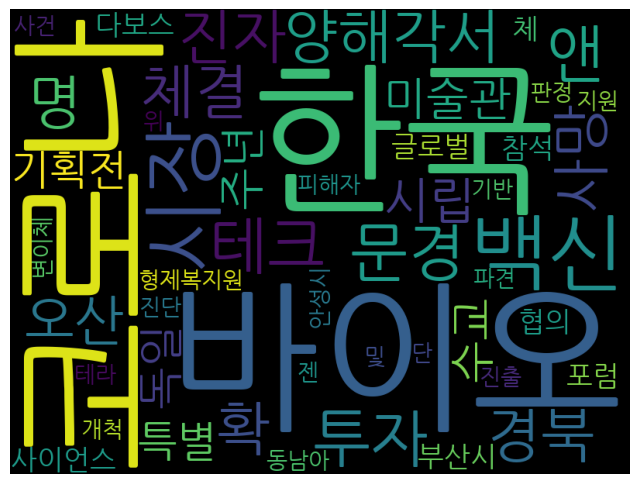

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud("./NanumGothic.ttf",width=800, height=600)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()